___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

In [219]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

In [220]:
def fill_most_freq(df, group_col, col_name):
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [221]:
def fill_prop(df, group_col, col_name):
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [222]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [223]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [224]:
def fill_median(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))        

# PART- 3 `( Handling With Outliers )`

In [134]:
df = pd.read_csv("scout_car_filled.csv")

In [135]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,hp_kW,Paint_Type,Upholstery_type,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Emission_Class
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,66.000,Metallic,Cloth,5.000,5.000,Automatic,1422.000,1220.000,front,3.800,99.000,Euro 6
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,141.000,Metallic,Cloth,3.000,4.000,Automatic,1798.000,1255.000,front,5.600,129.000,Euro 6
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,85.000,Metallic,Cloth,4.000,4.000,Automatic,1598.000,1259.453,front,3.800,99.000,Euro 6
3,Audi A1,Sedans,14500,Non-Discount,73000.000,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,66.000,Metallic,Cloth,3.000,4.000,Automatic,1422.000,1195.000,front,3.800,99.000,Euro 6
4,Audi A1,Sedans,16790,Non-Discount,16200.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,66.000,Metallic,Cloth,5.000,5.000,Automatic,1422.000,1259.453,front,4.100,109.000,Euro 6


In [136]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort & Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment & Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"


## km

In [137]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6689
--------------------------------
10.000       2045
1.000         367
5.000         170
50.000        148
100.000       139
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6689, dtype: int64


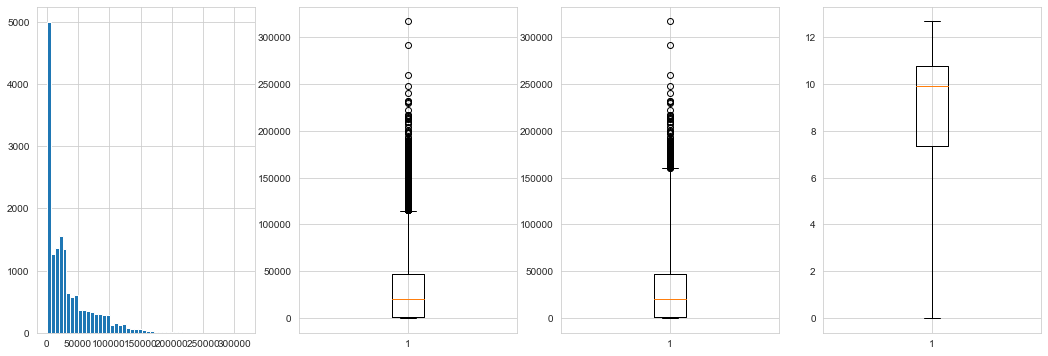

In [138]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

## Gears

In [139]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
6.000    9288
5.000    4499
7.000    1908
8.000     224
Name: Gears, dtype: int64


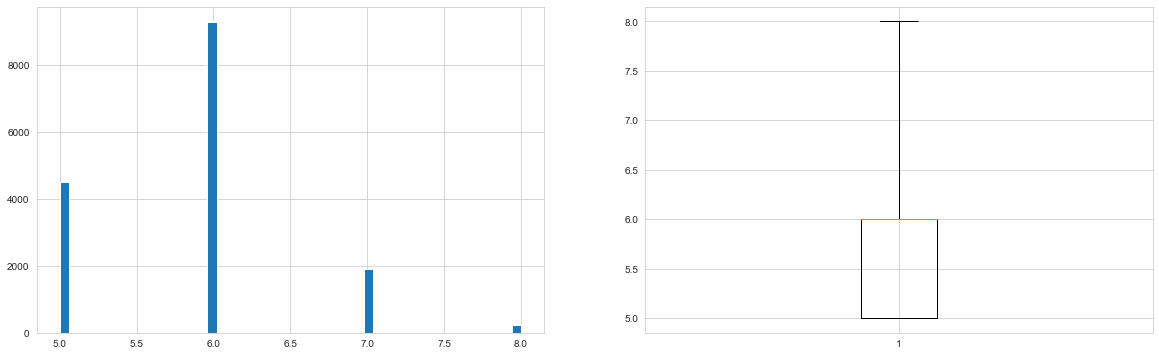

In [140]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [141]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

11305   8.000
12435   8.000
11843   8.000
11379   8.000
12442   8.000
11853   8.000
13054   8.000
13050   8.000
12437   8.000
11859   8.000
Name: Gears, dtype: float64

In [142]:
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears


In [143]:
 df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
14928,Renault Espace,Van,Automatic,6.000
14929,Renault Espace,Station wagon,Automatic,6.000
14930,Renault Espace,Transporter,Automatic,6.000
14931,Renault Espace,Van,Automatic,6.000
14932,Renault Espace,Van,Automatic,6.000
...,...,...,...,...
15914,Renault Espace,Van,Automatic,6.000
15915,Renault Espace,Van,Automatic,7.000
15916,Renault Espace,Van,Automatic,6.000
15917,Renault Espace,Van,Automatic,6.000


In [144]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [145]:
fill(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  0
------------------
6.000    9288
5.000    4499
7.000    1908
8.000     224
Name: Gears, dtype: int64


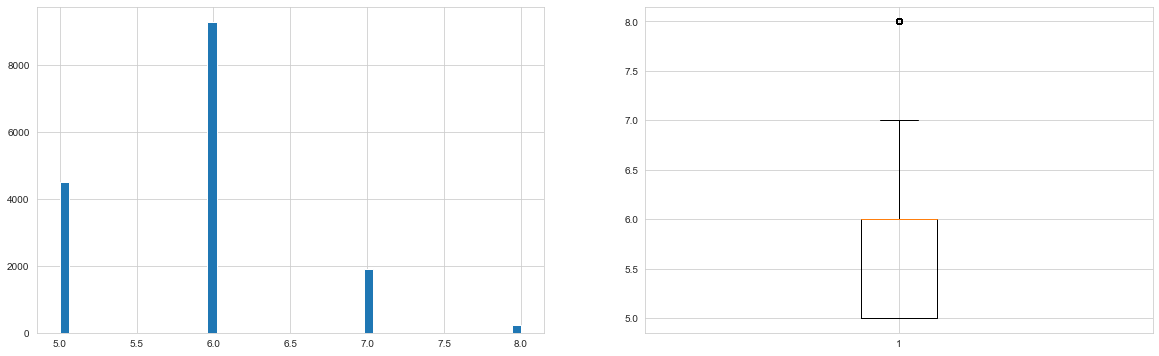

In [146]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

## Displacement_cc

In [147]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  94
--------------------------------
1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
1698.538       83
1280.951       72
998.000        72
1313.583       53
1702.110       51
1500.000       50
2000.000       46
1636.188       45
1520.183       41
1504.863       41
1000.000       40
1406.239       30
1998.000       25
1345.085       23
1347.123       21
2480.000       20
1163.789       19
1200.000       18
1984.000       18
1207.132       16
1283.804       15
1158.382       12
899.000        11
1397.000       11
1414.94

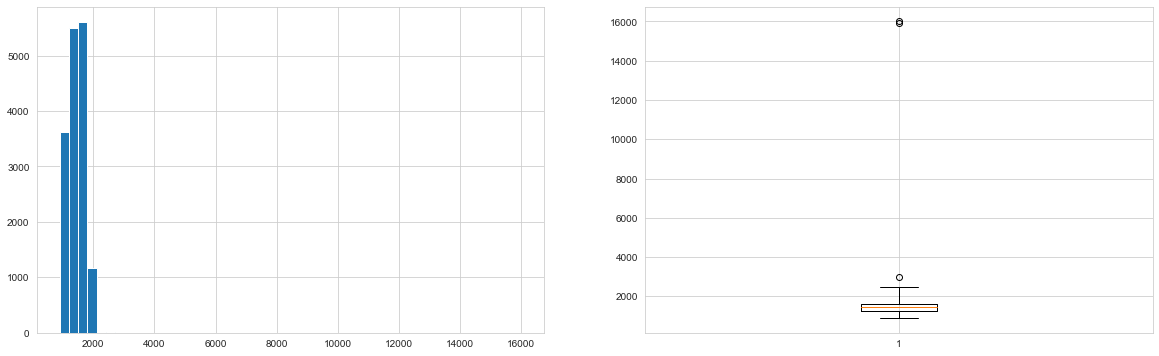

In [148]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [149]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10932   16000.000
7169    15898.000
10771    2967.000
3587     2480.000
3648     2480.000
Name: Displacement_cc, dtype: float64

In [150]:
df.sort_values(by=["Displacement_cc"], ascending=True)["Displacement_cc"].head(55)

14144   898.000
14701   898.000
14702   898.000
14703   898.000
14270   898.000
14704   898.000
14706   898.000
13723   898.000
14707   898.000
14708   898.000
14709   898.000
14710   898.000
14711   898.000
14700   898.000
14712   898.000
14714   898.000
14715   898.000
14716   898.000
14717   898.000
14718   898.000
14719   898.000
14720   898.000
14721   898.000
14722   898.000
14723   898.000
14724   898.000
14725   898.000
14713   898.000
14726   898.000
14699   898.000
14697   898.000
14274   898.000
14671   898.000
14672   898.000
14673   898.000
14674   898.000
14675   898.000
14676   898.000
14677   898.000
14678   898.000
14679   898.000
14680   898.000
14681   898.000
14698   898.000
14682   898.000
14684   898.000
14685   898.000
13751   898.000
14686   898.000
14687   898.000
14688   898.000
14690   898.000
14691   898.000
14693   898.000
14694   898.000
Name: Displacement_cc, dtype: float64

In [151]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [152]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [153]:
df.Displacement_cc.isnull().sum()

2

In [154]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    4763
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
1956.000     670
1461.000     595
1490.000     559
1422.000     467
1197.000     353
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
1698.538      83
998.000       72
1280.951      72
1313.583      53
1702.110      51
1500.000      50
2000.000      46
1636.188      45
1504.863      41
1520.183      41
1000.000      40
1406.239      30
1998.000      25
1345.085      23
1347.123      21
2480.000      20
1163.789      19
1200.000      18
1984.000      18
1207.132      16
1283.804      15
1158.382      12
1397.000      11
899.000       11
1414.945       7
1499.000       5
929.000        5
1667.345       4
997.000        4
1596.000       4
900.000        4
1199.000       3
1396.000       3
1323.125       3
1599.000  

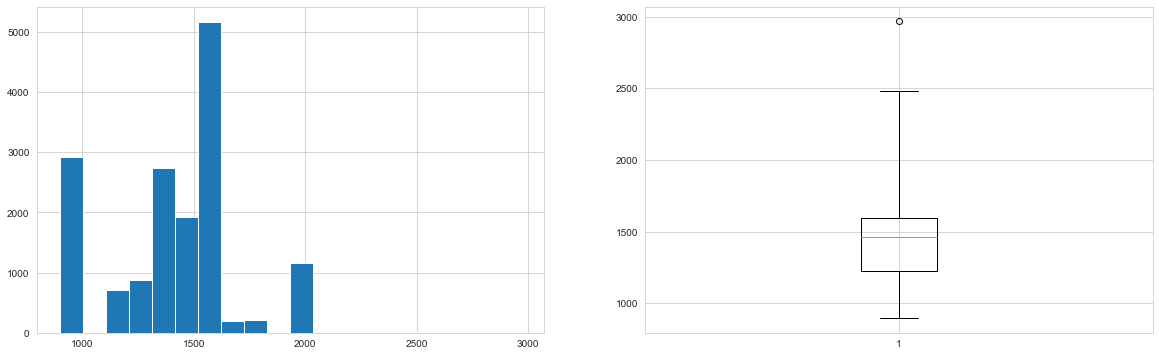

In [155]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [156]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10771   2967.000
3649    2480.000
3587    2480.000
3648    2480.000
3590    2480.000
Name: Displacement_cc, dtype: float64

## Weight_kg

In [157]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  460
--------------------------------
1395.477    991
1624.585    855
1175.411    733
1397.234    635
1259.453    622
           ... 
1258.000      1
1167.000      1
1331.000      1
1132.000      1
2037.000      1
Name: Weight_kg, Length: 460, dtype: int64


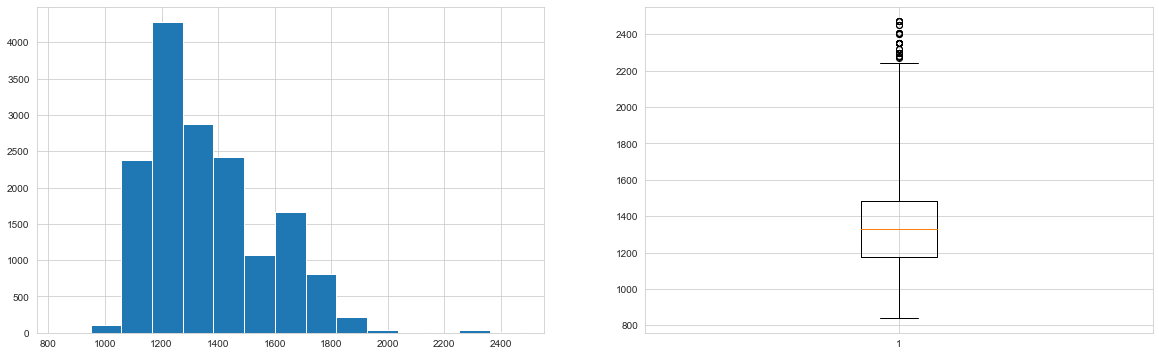

In [158]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

## hp_kW

In [159]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  91
--------------------------------
85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
131.753      34
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
73.873       20
78.000       20
146.000      18
294.000      18
141.000      16
72.133       10
57.000       10
120.000       8
116.317       8
104.000       8
77.154        8
58.189        8
191.000       7
112.000       7
155.000       6
110.969       6
117.000       6
90.685       

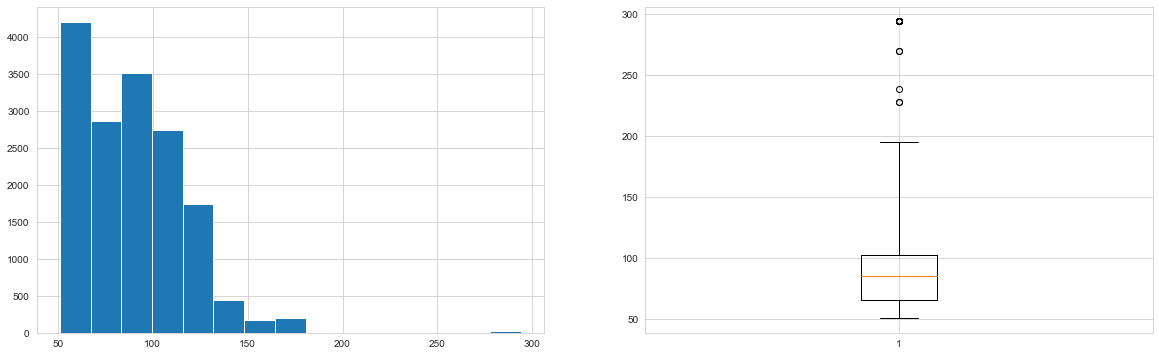

In [160]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

## CO2_Emission

In [161]:
first_looking("CO2_Emission")

column name    :  CO2_Emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  144
--------------------------------
120.000      740
99.000       545
97.000       538
104.000      501
102.000      477
103.000      445
114.000      382
124.000      372
107.000      362
108.000      362
119.000      361
106.000      349
128.000      329
148.484      302
126.000      282
109.424      277
85.000       275
118.000      270
110.000      266
127.000      257
117.000      254
111.000      237
113.000      235
109.000      234
139.000      224
140.000      218
135.836      215
103.006      215
129.000      213
137.676      207
105.000      202
135.000      202
92.000       198
150.366      186
130.000      180
123.000      178
150.000      174
143.000      171
111.811      171
112.000      171
95.000       161
136.000      158
116.000      157
141.000      156
98.000       151
129.787      149
133.000      145
125.764      143
137.000      133
125.

In [162]:
df.CO2_Emission.value_counts().sort_index()

80.000         1
82.000        25
84.000         2
85.000       275
87.000         6
88.000        15
89.000        19
90.000        35
91.000        31
92.000       198
93.000        66
94.000        37
95.000       161
96.000        22
97.000       538
98.000       151
99.000       545
100.000       36
101.000      105
101.200       19
102.000      477
103.000      445
103.006      215
103.800        1
104.000      501
105.000      202
106.000      349
106.398       92
107.000      362
107.384       86
108.000      362
108.246       44
109.000      234
109.214       51
109.424      277
110.000      266
110.722       23
111.000      237
111.811      171
112.000      171
112.167        1
112.400        3
113.000      235
113.009        3
114.000      382
114.941       91
115.000       86
116.000      157
117.000      254
118.000      270
119.000      361
120.000      740
120.600        3
120.940        2
121.000       82
122.000       83
123.000      178
123.857        1
124.000      3

In [163]:
cond = ((df.CO2_Emission < 36) | (df.CO2_Emission > 330))

df.loc[cond, "CO2_Emission"] = np.nan

In [164]:
df.CO2_Emission.isnull().sum()

9

In [165]:
fill(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
120.000    740
99.000     545
97.000     538
104.000    501
102.000    477
103.000    445
114.000    382
124.000    373
107.000    364
108.000    362
119.000    361
106.000    350
128.000    329
148.484    302
126.000    282
109.424    277
85.000     275
118.000    270
110.000    266
127.000    257
117.000    254
111.000    237
113.000    235
109.000    234
139.000    224
140.000    218
135.836    215
103.006    215
129.000    213
137.676    207
105.000    202
135.000    202
92.000     198
150.366    186
130.000    180
123.000    178
150.000    174
112.000    171
143.000    171
111.811    171
95.000     161
136.000    159
116.000    157
141.000    156
98.000     151
129.787    149
133.000    145
125.764    143
137.000    133
125.000    133
134.000    130
145.000    126
140.382    121
149.000    117
153.000    113
147.000    109
101.000    105
132.000    101
106.398     92
114.941     91
115.000     86
107.384     86
121.000     84
122.000     83
13

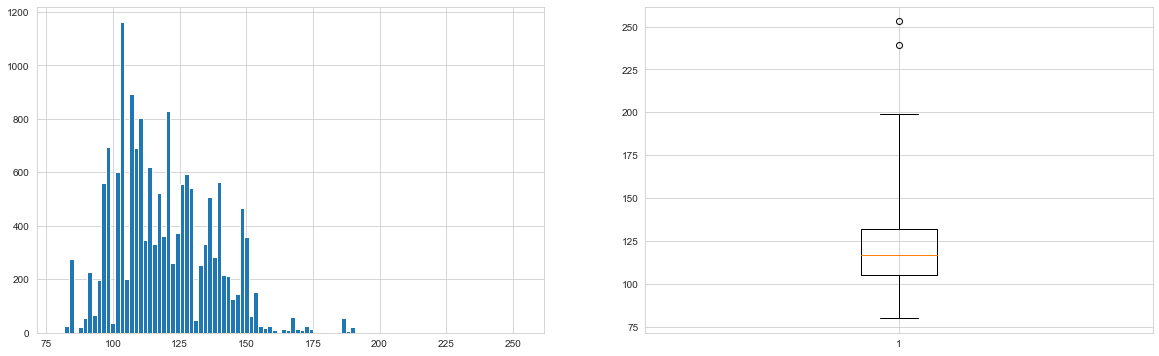

In [166]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

## cons_comb

In [167]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  83
--------------------------------
5.400     770
3.900     733
4.000     713
5.100     657
4.400     623
5.600     618
4.700     605
3.800     585
4.800     546
5.000     545
4.500     523
5.200     454
4.200     436
4.600     426
4.900     393
5.500     381
5.300     380
5.900     372
3.700     369
5.700     342
4.100     342
6.000     331
4.330     310
4.300     307
3.300     307
3.500     288
5.488     275
6.200     216
3.600     194
4.623     187
6.300     181
6.100     175
5.800     164
5.483     156
5.401     150
6.600     148
4.709     147
4.298     144
4.867     143
6.800     136
5.201     128
3.400     106
5.572      91
6.400      75
3.000      69
7.400      66
4.896      60
4.585      58
4.249      55
6.700      43
6.500      43
4.482      43
7.100      38
10.000     36
6.900      27
3.200      25
4.515      21
8.300      20
4.328      20
4.170      19
7

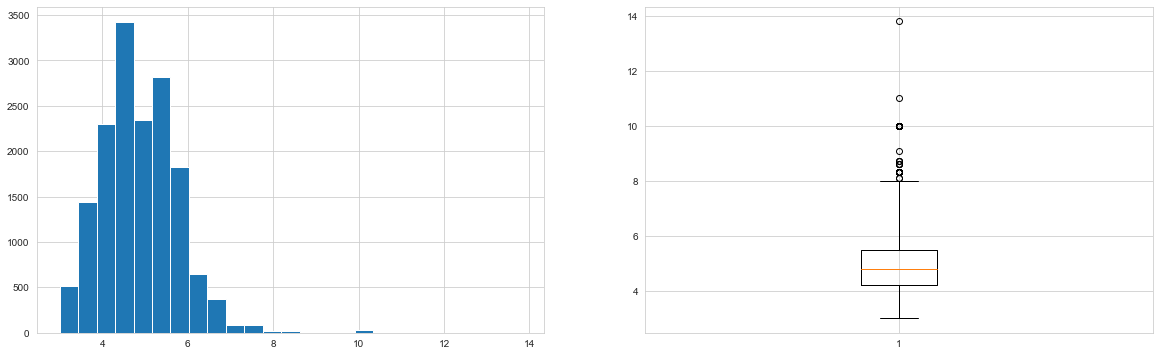

In [168]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

## Nr_of_Doors

In [169]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
5.000    11788
4.000     3079
3.000      833
2.000      219
Name: Nr_of_Doors, dtype: int64


In [170]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [171]:
df.Nr_of_Doors.isnull().sum()

0

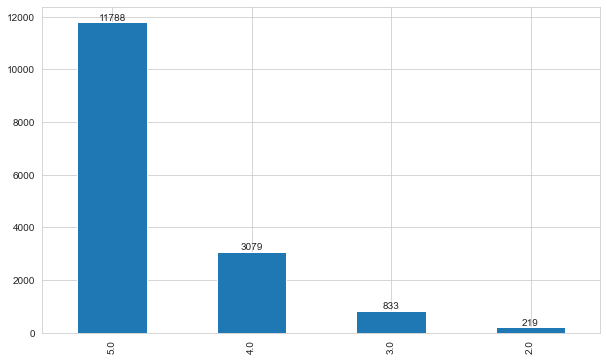

In [172]:
fig, ax = plt.subplots()

df.Nr_of_Doors.value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

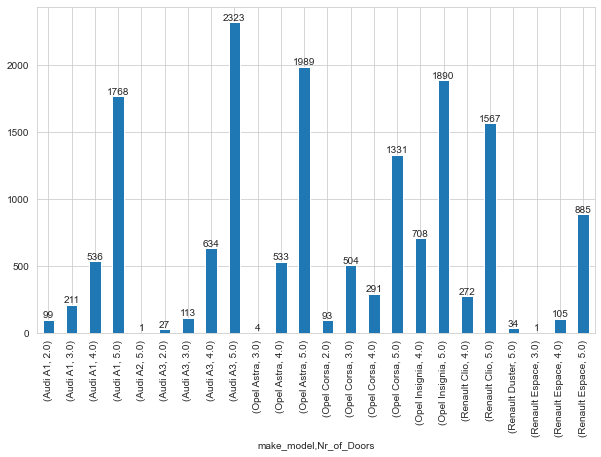

In [173]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [174]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

## Nr_of_Seats

In [175]:
first_looking("Nr_of_Seats")

column name    :  Nr_of_Seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
5.000    14315
4.000     1126
7.000      362
2.000      116
Name: Nr_of_Seats, dtype: int64


In [176]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [177]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.000    14315
4.000     1126
7.000      362
2.000      116
Name: Nr_of_Seats, dtype: int64


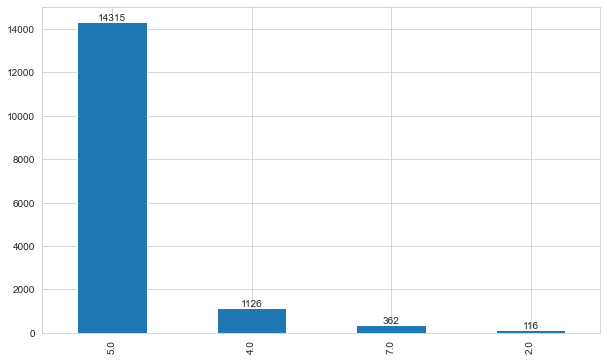

In [178]:
fig, ax = plt.subplots()

df.Nr_of_Seats.value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [179]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

## price

In [180]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


In [181]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [182]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [183]:
df.drop(drop_index, axis=0, inplace=True)

In [184]:
df.shape

(15915, 22)

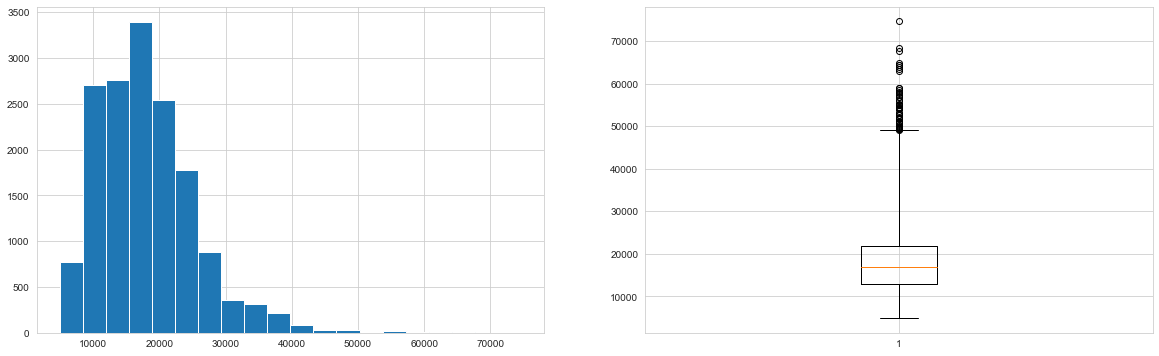

In [185]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

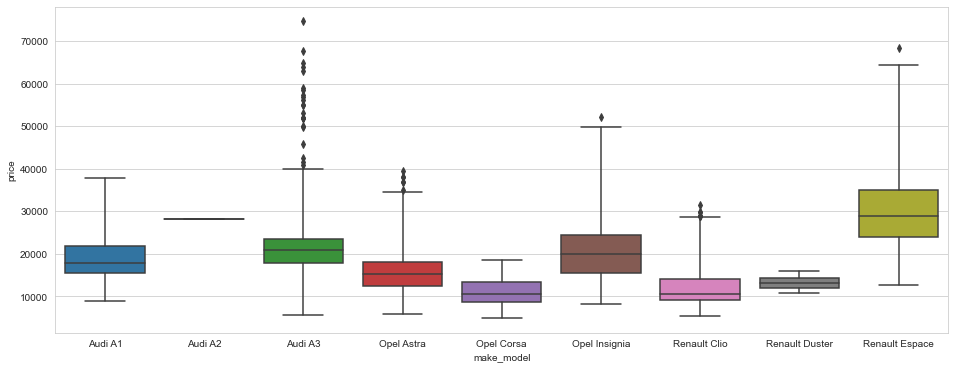

In [186]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## make_model

In [187]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [188]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Emission_Class
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,85.000,Metallic,Cloth,Manual,1598.000,1507.524,front,4.900,160.045,Euro 6


In [189]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [190]:
df.drop(drop_index, axis=0, inplace=True)

In [191]:
df.shape

(15914, 22)

## Fuel

In [192]:
first_looking("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64


In [193]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,cons_comb,price
3356,Audi A3,Compact,109.214,6.000,150.000,4.328,24950
3612,Audi A3,Sedans,109.424,6.000,110.000,4.330,38450
3615,Audi A3,Sedans,109.424,6.000,110.000,4.330,35899
3617,Audi A3,Sedans,109.424,6.000,110.000,4.330,38000
13397,Renault Clio,Sedans,111.811,6.000,73.873,4.709,8490


In [194]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [195]:
df.drop(drop_index, axis=0, inplace=True)

In [196]:
df.reset_index(drop=True, inplace=True)

In [197]:
df.shape

(15909, 22)

# Final Step (Checking final situation of data via graphs)

In [198]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort & Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment & Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15909 non-null  object 
 1   body_type              15909 non-null  object 
 2   price                  15909 non-null  int64  
 3   vat                    15909 non-null  object 
 4   km                     15909 non-null  float64
 5   Type                   15908 non-null  object 
 6   Fuel                   15909 non-null  object 
 7   Comfort & Convenience  15909 non-null  object 
 8   Entertainment & Media  15909 non-null  object 
 9   Extras                 15909 non-null  object 
 10  Safety & Security      15909 non-null  object 
 11  Gears                  15909 non-null  float64
 12  hp_kW                  15909 non-null  float64
 13  Paint_Type             15909 non-null  object 
 14  Upholstery_type        15909 non-null  object 
 15  Ge

In [200]:
df_num = df.select_dtypes("number")
df_num

,price,km,Gears,hp_kW,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000,6.000,66.000,1422.000,1220.000,3.800,99.000
1,14500,80000.000,7.000,141.000,1798.000,1255.000,5.600,129.000
2,14640,83450.000,6.000,85.000,1598.000,1259.453,3.800,99.000
3,14500,73000.000,6.000,66.000,1422.000,1195.000,3.800,99.000
4,16790,16200.000,6.000,66.000,1422.000,1259.453,4.100,109.000
...,...,...,...,...,...,...,...,...
15904,39950,10.000,6.000,147.000,1997.000,1758.000,5.300,139.000
15905,39885,9900.000,7.000,165.000,1798.000,1708.000,7.400,168.000
15906,39875,15.000,6.000,146.000,1997.000,1711.336,5.300,139.000
15907,39700,10.000,6.000,147.000,1997.000,1758.000,5.300,139.000


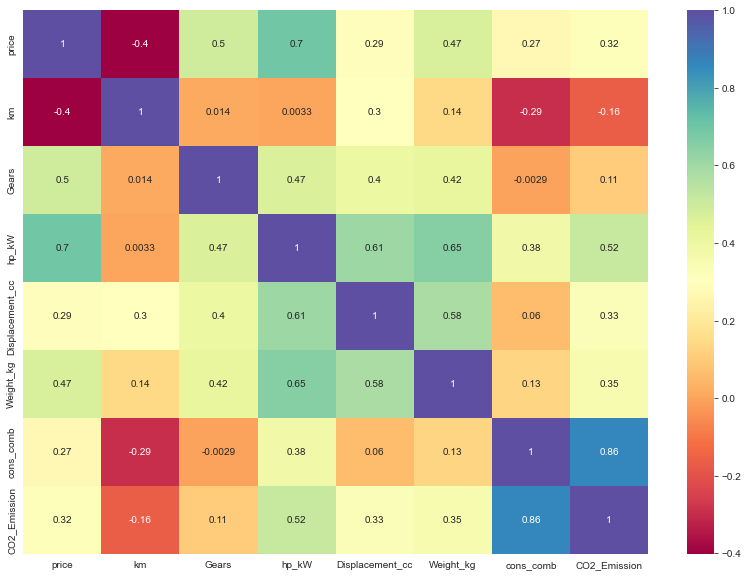

In [201]:
plt.figure(figsize = (14,10))
sns.heatmap(data=df.corr(), 
            annot=True, 
            cmap='Spectral');

In [202]:
def color_correlation(val):
    
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,price,km,Gears,hp_kW,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.401078,0.495118,0.696906,0.292075,0.472102,0.267988,0.317747
km,-0.401078,1.000000,0.014145,0.003272,0.300877,0.144884,-0.292775,-0.164126
Gears,0.495118,0.014145,1.000000,0.465384,0.399103,0.422197,-0.002871,0.106322
hp_kW,0.696906,0.003272,0.465384,1.000000,0.606012,0.652637,0.380424,0.516445
Displacement_cc,0.292075,0.300877,0.399103,0.606012,1.000000,0.582192,0.059602,0.332195
Weight_kg,0.472102,0.144884,0.422197,0.652637,0.582192,1.000000,0.133518,0.349531
cons_comb,0.267988,-0.292775,-0.002871,0.380424,0.059602,0.133518,1.000000,0.860872
CO2_Emission,0.317747,-0.164126,0.106322,0.516445,0.332195,0.349531,0.860872,1.000000


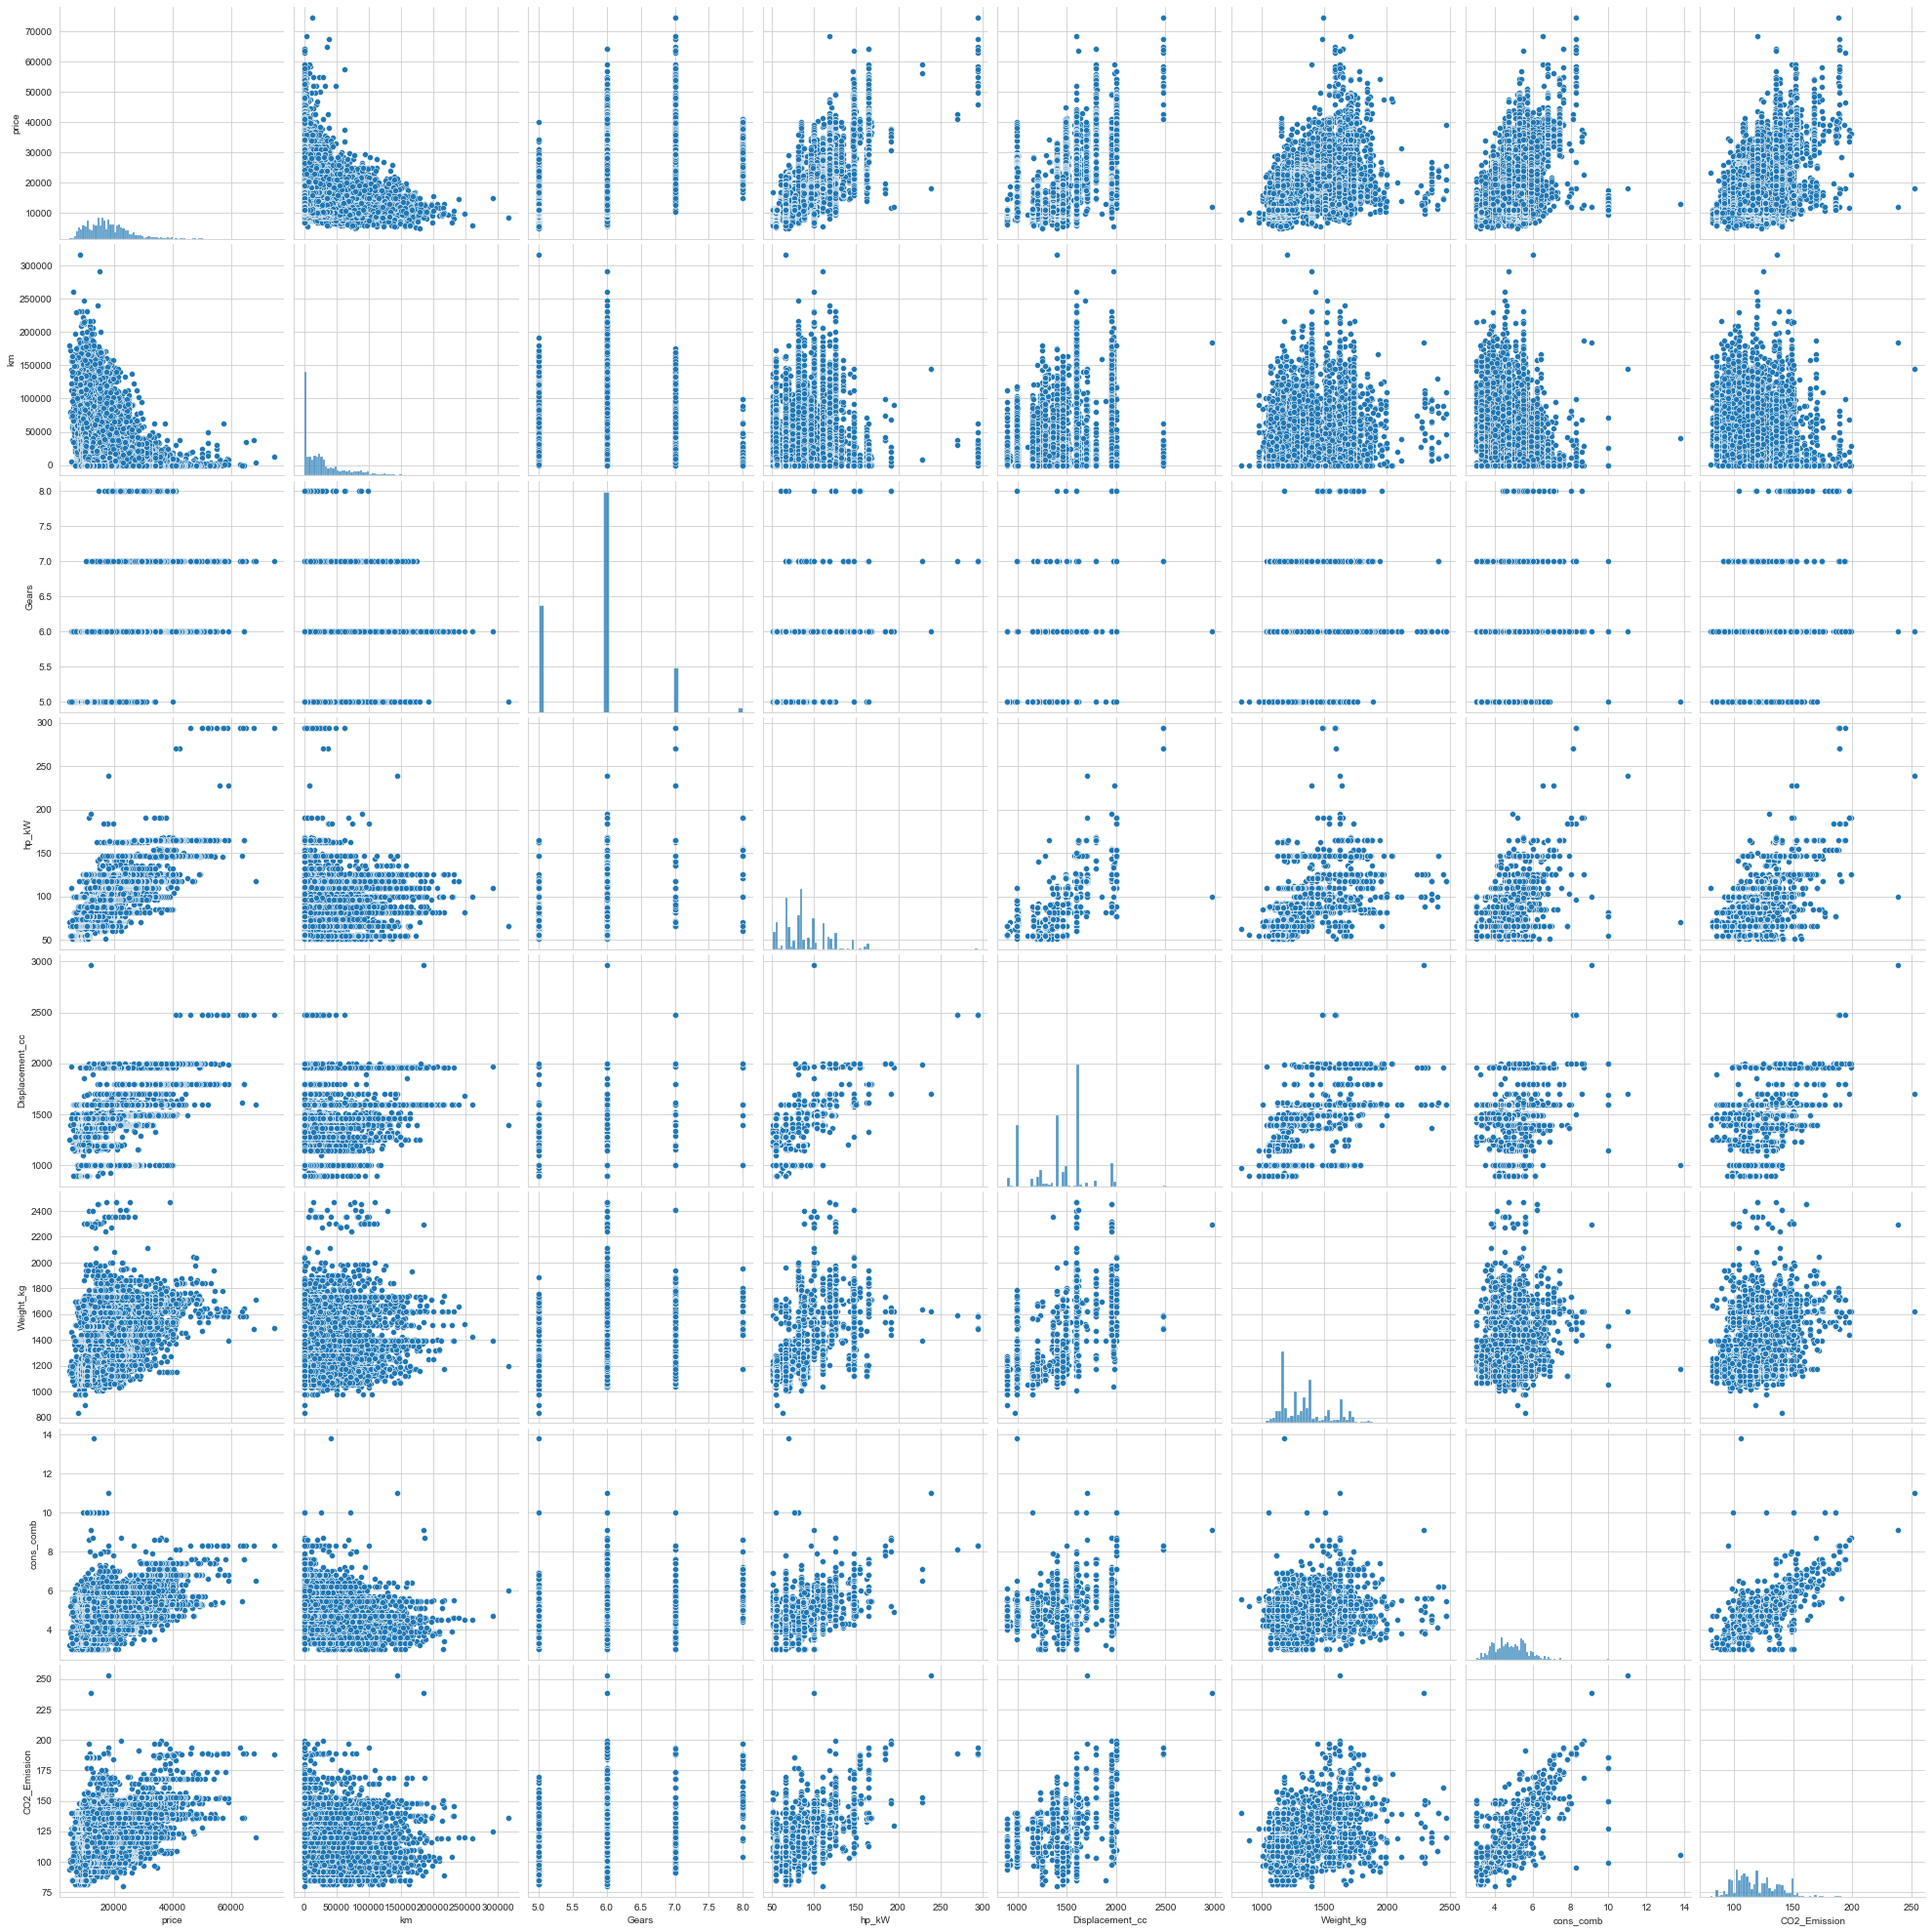

In [203]:
sns.pairplot(df_num, size=3.5);

<AxesSubplot:>

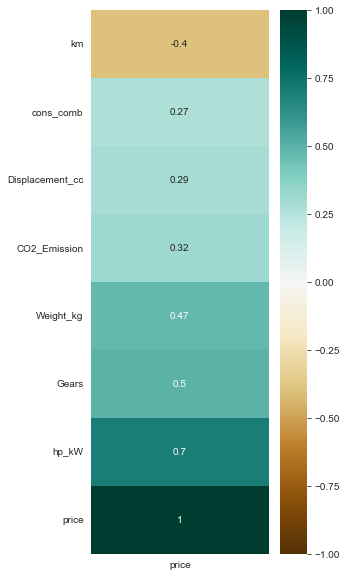

In [204]:
fig,ax = plt.subplots(figsize=(4, 10))
sns.heatmap(data=df.corr()[['price']].sort_values(by='price'),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG')

## Export dataframe to csv file (without dummy)

In [205]:
df.shape

(15909, 22)

In [206]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [207]:
df.shape

(15909, 22)

# Dummy Operation

In [208]:
df.shape

(15909, 22)

In [210]:
df = df.join(df["Comfort & Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment & Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety & Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [212]:
df.drop(["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security"], axis=1, inplace=True)

In [213]:
df.shape

(15909, 112)

In [214]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,Non-Discount,Non-Discount
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,6.000,7.000,6.000,6.000,6.000
hp_kW,66.000,141.000,85.000,66.000,66.000
Paint_Type,Metallic,Metallic,Metallic,Metallic,Metallic


In [215]:
df_final = pd.get_dummies(df, drop_first=True)

In [216]:
df_final.shape

(15909, 136)

In [217]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
Gears,6.000,7.000,6.000,6.000,6.000
hp_kW,66.000,141.000,85.000,66.000,66.000
Displacement_cc,1422.000,1798.000,1598.000,1422.000,1422.000
Weight_kg,1220.000,1255.000,1259.453,1195.000,1259.453
cons_comb,3.800,5.600,3.800,3.800,4.100
CO2_Emission,99.000,129.000,99.000,99.000,109.000
cc_Air conditioning,1.000,1.000,1.000,0.000,1.000
cc_Air suspension,0.000,0.000,0.000,1.000,0.000


## Export dataframe to csv file (dummy)

In [218]:
df_final.to_csv("final_scout_dummy.csv", index=False)